In [2]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [3]:
def get_logger(pth):
    with open(pth, 'rb') as f:
        logger = pickle.load(f)
    logger.train_loss = np.asarray(logger.train_loss)
    logger.train_conf = np.asarray(logger.train_conf)

    logger.valid_loss = np.asarray(logger.valid_loss)
    logger.valid_conf = np.asarray(logger.valid_conf)

    logger.test_loss = np.asarray(logger.test_loss)
    logger.test_conf = np.asarray(logger.test_conf)

    logger.elapsed_time = np.asarray(logger.elapsed_time)
    
    return logger

In [12]:
cva = '../cva_sine_result_files/updatefinder100k_10000_40_0_1.pkl'
cavia = '../sine_result_files/long10000__10_25.pkl'
maml = '../maml_sine_result_files/long10000__1_25.pkl'

loggers = {
    'cva': get_logger(cva),
    'cavia': get_logger(cavia),
    'maml': get_logger(maml)
}

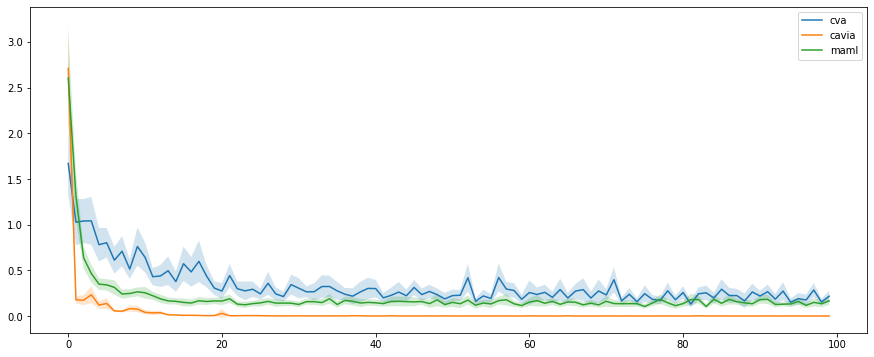

In [11]:
# plot the performance of everything
alpha = 0.2
for i, logger in loggers.items():
    x = [j for j in range(len(logger.test_loss))]
    
    plt.plot(x, logger.test_loss, label=i)
    plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.ylim(0,.5)
plt.show()

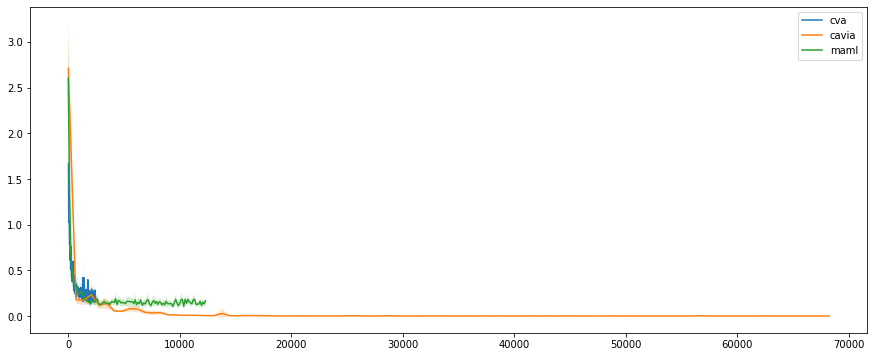

In [17]:
# performance vs time 
for i, logger in loggers.items():
    x = [j for j in range(len(logger.test_loss))]
    plt.plot(logger.elapsed_time, logger.test_loss, label=i)
    plt.fill_between(logger.elapsed_time, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=alpha)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
# plt.xlim(0,2500)
plt.show()

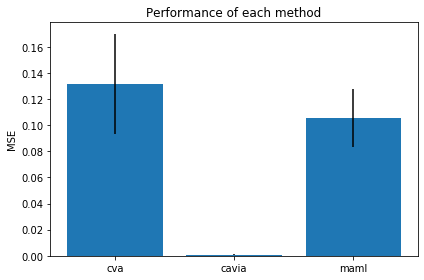

In [9]:
perf = []
perfsd = []
for i, logger in loggers.items():
    idx = np.argmin(loggers[i].test_loss)
    perf.append(loggers[i].test_loss[idx])
    perfsd.append(loggers[i].test_conf[idx])
perf = np.asarray(perf)
perfsd = np.asarray(perfsd)
    
x = np.arange(len(loggers.keys()))
plt.bar(x, perf, yerr=perfsd, align='center')
plt.xticks(x, loggers.keys())
plt.ylabel('MSE')
plt.title('Performance of each method')
plt.tight_layout()

plt.show()

In [5]:
# tasks per update experiment
tpus = ['25', '50', '100', '1000']
pref = '../cva_sine_result_files/tpu100k_10000_25_0_'
suff = '.pkl'
loggers = {}
for tpu in tpus:
    loggers[tpu] = get_logger(pref + tpu + suff)

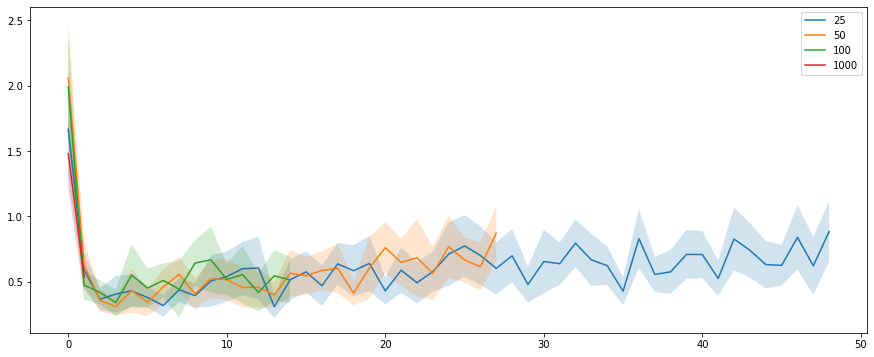

In [9]:
for tpu, logger in loggers.items():
    x = np.arange(len(logger.test_loss))
    plt.plot(x, logger.test_loss, label=tpu)
    plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=0.2)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

In [8]:
for tpu, logger in loggers.items():
    print(f'min error of {tpu}: {np.min(logger.test_loss)}')

min error of 25: 0.3107490642927587
min error of 50: 0.311367674684152
min error of 100: 0.3408211709838361
min error of 1000: 0.5367139035649597


In [23]:
# resetter experiments
rfreq = ['1', '100', '1000', '10000']
pref = '../cva_sine_result_files/finalreset_'
suff = '_1000_40_0_1.pkl'
loggers = {}
for r in rfreq:
    loggers[r] = get_logger(pref + r + suff)


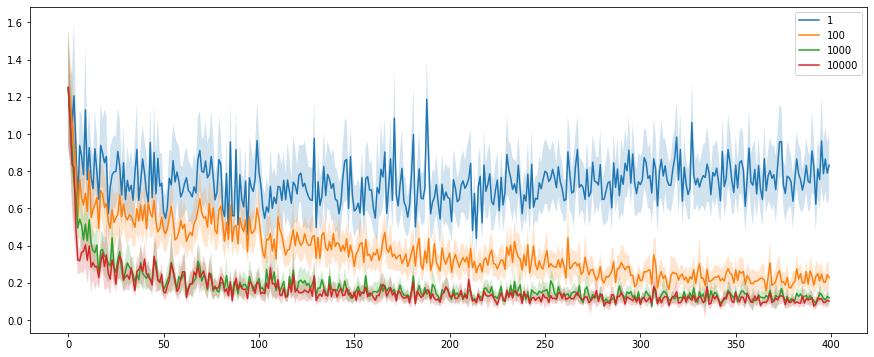

In [24]:
for r, logger in loggers.items():
    x = np.arange(len(logger.test_loss))
    plt.plot(x, logger.test_loss, label=r)
    plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=0.2)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

In [25]:
for r, logger in loggers.items():
    print(f'min error of reset freq {r}: {np.min(logger.test_loss)}')

min error of reset freq 1: 0.439131940305233
min error of reset freq 100: 0.15688541087321936
min error of reset freq 1000: 0.07255093070911244
min error of reset freq 10000: 0.07417048671282828


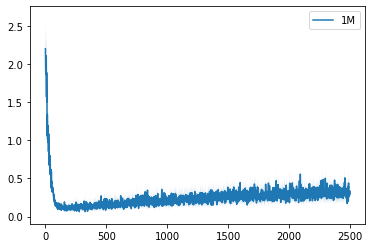

min: 0.06395797423552722, occred at test num 278, of 2500
1112000, or 0.1112


In [27]:
# for the luls
logger = get_logger('../cva_sine_result_files/forluls_100000_40_0_1.pkl')
x = np.arange(len(logger.test_loss))
plt.plot(x, logger.test_loss, label='1M')
plt.fill_between(x, logger.test_loss+logger.test_conf, logger.test_loss-logger.test_conf, alpha=0.2)
plt.legend()
plt.show()
print(f'min: {np.min(logger.test_loss)}, occred at test num {np.argmin(logger.test_loss)}, of {len(logger.test_loss)}')
print(f'{np.argmin(logger.test_loss)*4000}, or {np.argmin(logger.test_loss)/len(logger.test_loss)}')

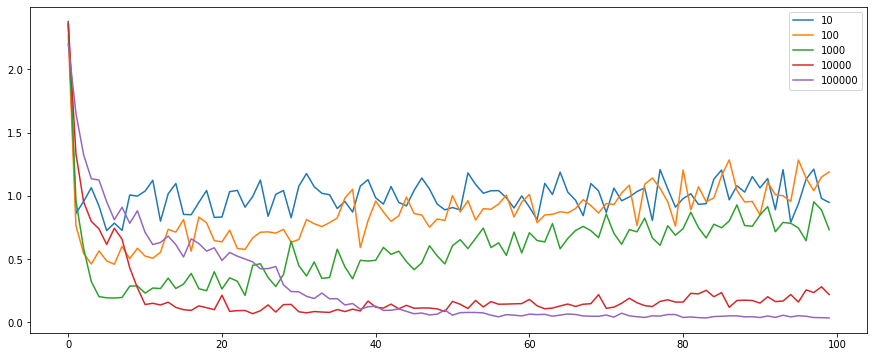

In [29]:
# embedding learning rate smaller
amnts = ['10', '100', '1000', '10000', '100000']
cva_pref = '../cva_sine_result_files/difflrs_irsmal_'
cva_suff = '_40_0_1.pkl'
cavia_pref = '../sine_result_files/final'
cavia_suff = '__10_25.pkl'
maml_pref = '../maml_sine_result_files/final'
maml_suff = '__10_25.pkl'
loggers = {
    'cva': {},
    'cavia': {},
    'maml': {}
}
for amnt in amnts:
    loggers['cva'][amnt] = get_logger(cva_pref + amnt + cva_suff)
    loggers['cavia'][amnt] = get_logger(cavia_pref + amnt + cavia_suff)
    loggers['maml'][amnt] = get_logger(maml_pref + amnt + maml_suff)

for amnt, logger in loggers['cva'].items():
    plt.plot(np.arange(len(logger.test_loss)), logger.test_loss, label=amnt)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show() 